# 3 Decision Trees and Random Forests

One of the models we'd like to use decision trees and ensemble forests.

The primary reason of which is that it's scale invariant. Meaning that we can use the `raw` version as the splits would still be the same. 

### Libraries

In [1]:
from DataLoader import DataLoader

import numpy as np
import matplotlib.pyplot as plt

# Data Prep
from sklearn.model_selection import train_test_split 

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_score

### Metric

The metric used will be `precision_score` since we're only interested in how well the Predictions are.

Gauging the Actual Positive/Negative isn't as important here.

In [2]:
def get_Score(model, X_train, X_test, y_train, y_test, verbose=1):
    precision_train = precision_score(model.predict(X_train), y_train, average=None)
    precision_test = precision_score(model.predict(X_test), y_test, average=None)
    
    if verbose == 1:
        graph_Scores((precision_train, precision_test))

        print(f"Train Avg Precision : {precision_train.mean():.4f}")
        print(f"Test  Avg Precision : {precision_test.mean():.4f}")
        
    return precision_train, precision_test;

In [3]:
def graph_Scores(scores):
    width = 0.4
    br1 = range(len(scores[0])) 
    br2 = [x + width for x in br1] 

    plt.bar(br1, scores[0], width=width, label='Train Score')
    plt.bar(br2, scores[1], width=width, label='Test Score')
    plt.ylabel('Precision Score')
    plt.xlabel('Class / Genre')
    
    plt.legend()
    plt.show()        

### Make the results reproducible.

In [4]:
random_state = 42

### Dataset

In [5]:
# Get only the desired dataframe. We don't need the entire object.
df = DataLoader('Dataset 6 - Music Dataset/music.csv', True, True).df['raw']
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration (seconds),Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.000090,0.0849,0.8990,134.071,234.596,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251.733,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109.667,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.000090,0.1220,0.5690,107.033,173.968,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229.960,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193.450,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257.067,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216.222,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219.693,8


# 3.0 Setup the features and splits. 

In [6]:
X = df.drop(columns='Class')
y = df['Class']

print(f'X [{X.shape}] : {X.columns}')
print(f'y [{y.shape}]')

X [(17996, 13)] : Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration (seconds)'],
      dtype='object')
y [(17996,)]


### Perform train test split.
Set `test_size` to 0.2 and `stratify` to y to ensure proportional sampling. 

X_train (14396, 13)
y_train (14396,)
X_test (3600, 13)
y_test (3600,)


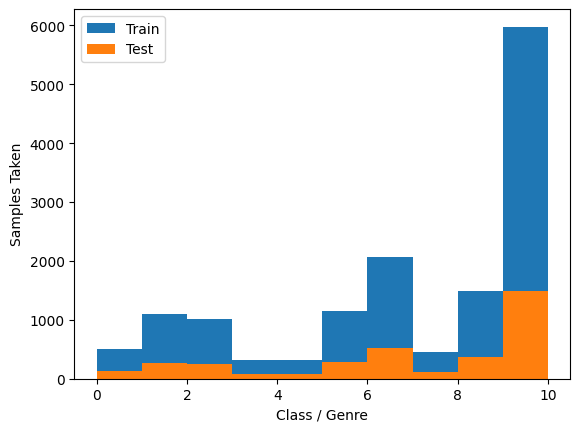

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

print(f'X_train {X_train.shape}')
print(f'y_train {y_train.shape}')
print(f'X_test {X_test.shape}')
print(f'y_test {y_test.shape}')

plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.ylabel('Samples Taken')
plt.xlabel('Class / Genre')

plt.legend()
plt.show()

# 3.1 Decision Tree

In [8]:
tree = DecisionTreeClassifier(random_state=random_state)

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Score

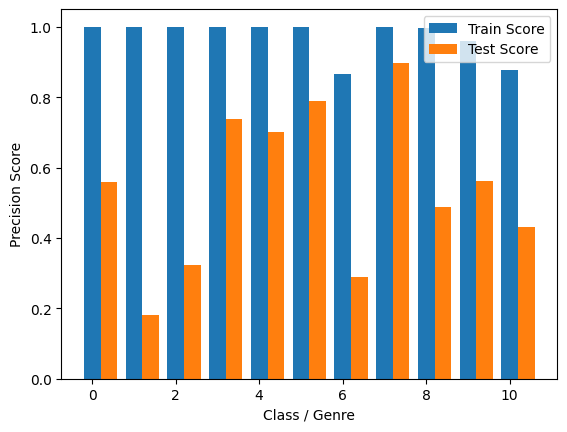

Train Avg Precision : 0.9721
Test  Avg Precision : 0.5419


In [11]:
scores_vtree = get_Score(tree, X_train, X_test, y_train, y_test)

### Vanilla Tree Results

The difference between training and test score is too high, indicating that it's overfit to the training data.

Overfitting is a common problem for decision trees as they endlessly make splits, only stopping upon reaching 2 leaf nodes.

To control this, we can try telling it to limit maximum depth. This should stop it from generating splits that are too specific.

<i>Note: We're just glossing through the basic tree and not trying to perfect it.</i>

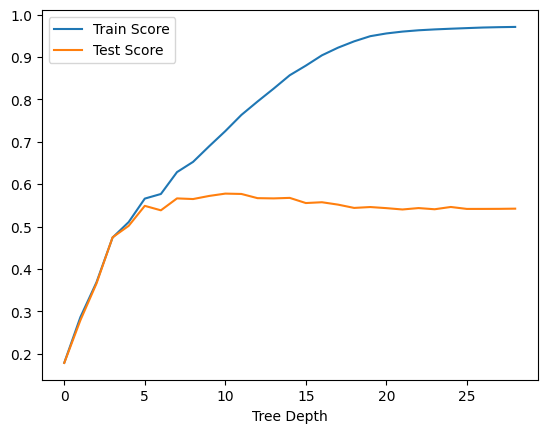

In [13]:
score_train =[] 
score_test = []

for i in range(1, 30):
    tree = DecisionTreeClassifier(random_state=random_state, max_depth=i)
    tree.fit(X_train, y_train)

    scores = get_Score(tree, X_train, X_test, y_train, y_test, verbose=0)
    score_train.append(scores[0].mean())
    score_test.append(scores[1].mean())


plt.plot(score_train, label='Train Score')
plt.plot(score_test, label='Test Score')

plt.xlabel('Prediction Score')
plt.xlabel('Tree Depth')
plt.legend()

plt.show()

### Max Depth Tweaking Results

Even though we ran multiple models with increasing depths, we still see that our test score can only peak to around 0.55.

Max depth is reached around 20 layers as the results start plateauing onwards, meaning that increasing the maximum is pointless as it no longer reaches it that depth.

# 3.2 Random Forests

Random Forests are an ensemble/collection of trees that decide based on a majority vote by all trees.

This significantly reduces the chances of overfitting since we're consulting multiple models and getting their aggregated prediction.

In addition, we're introduced to bootstrapping and bagging. A technique that randomly subsamples the training set allowing more variation.

In [14]:
forest = RandomForestClassifier(random_state=random_state)

In [15]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Forest Score

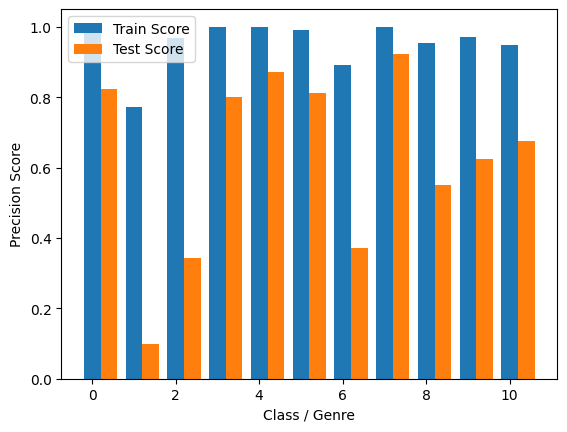

Train Avg Precision : 0.9539
Test  Avg Precision : 0.6264


In [17]:
scores_vforest = get_Score(forest, X_train, X_test, y_train, y_test)

### Forest vs Tree Score Difference

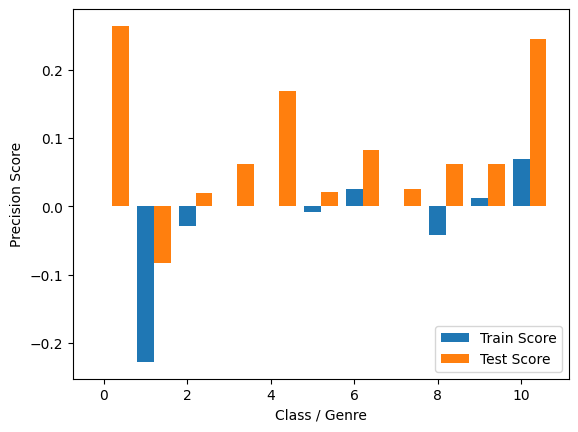

In [18]:
graph_Scores(np.array(scores_vforest) - np.array(scores_vtree))

## Vanilla RForest Results

Compared to the single DecisionTree we see the Forest performs better.

It increased the testing score for most Classes. Training score also changed in different ways.

There is concern with Class 1 as it's score has always been low in DecisionTree and now even lower in RandomForest.

### What does the forest think?

Let's check what the model thinks are the most important features and try removing those features that may just be noise.

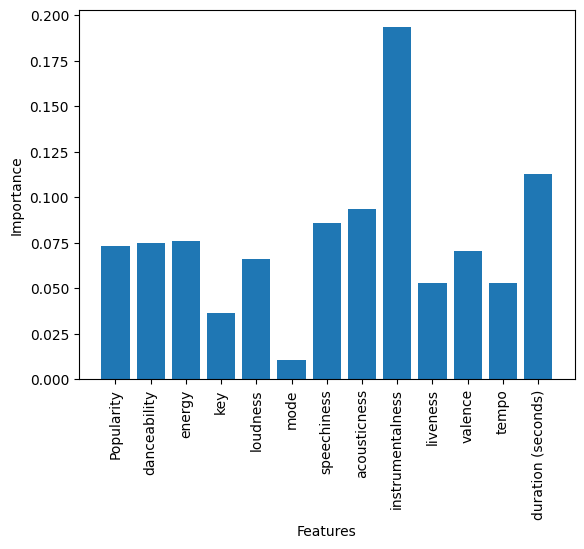

In [19]:
plt.bar(x=forest.feature_names_in_, height=forest.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

### Does excluding those features imporve our results on a new forest?

Note that forests are able to their own feature selection as well.

In [20]:
cols = X_train.columns.drop(['mode', 'key', 'liveness', 'tempo'])

feature_forest = RandomForestClassifier(random_state=random_state)
feature_forest.fit(X_train[cols], y_train)

RandomForestClassifier(random_state=42)

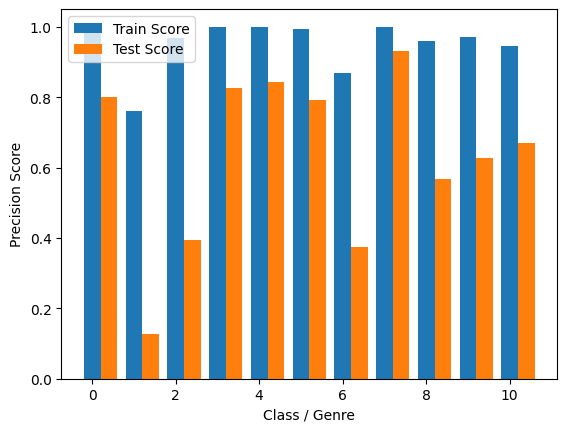

Train Avg Precision : 0.9509
Test  Avg Precision : 0.6320


(array([0.998     , 0.76047359, 0.9675835 , 1.        , 1.        ,
        0.99222126, 0.86853552, 1.        , 0.95819285, 0.97028232,
        0.944683  ]),
 array([0.8       , 0.12727273, 0.39370079, 0.825     , 0.84415584,
        0.79310345, 0.37451737, 0.93043478, 0.56603774, 0.62772277,
        0.66969697]))

In [23]:
get_Score(feature_forest, X_train[cols], X_test[cols], y_train, y_test)

### No

RandomForest's own feature selection already does a sufficient job in the weights it gives the features hence there's no improvement from dropping low weight features. 

## Finding the Best Forest Hyperparameters

Seeing Random Forests' potential, let's try tweaking the hyperparameters until we end up with a best model.

We will be using RandomizedSearchCV since iterating through each combination may take too long.

In [24]:
param_grid = {
    'n_estimators' : range(100, 1000, 10),
    "max_depth": range(3, 10),
    # "min_samples_split": np.arange(.1,.6,.1),
    # "min_samples_leaf": np.arange(.1,.6,.1),
    # "max_features": np.arange(0.1, 0.6, .1)
}

# RandomForestClassifier?

In [25]:
forest = RandomForestClassifier(random_state=random_state)

cv = RandomizedSearchCV(forest, param_grid, n_jobs=-1, verbose=2)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': range(3, 10),
                                        'n_estimators': range(100, 1000, 10)},
                   verbose=2)

In [26]:
model = cv.best_estimator_
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

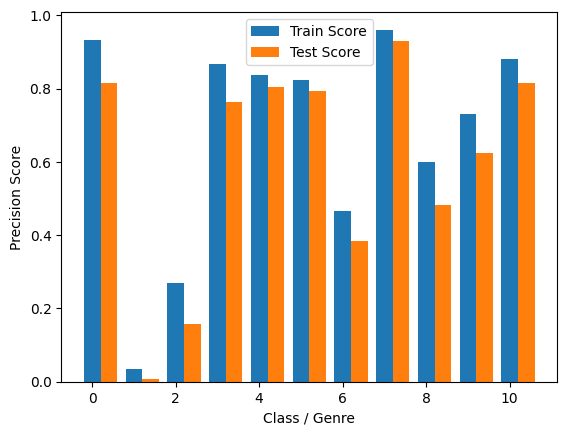

Train Avg Precision : 0.6731
Test  Avg Precision : 0.5981


(array([0.934     , 0.03369763, 0.26817289, 0.86645963, 0.83870968,
        0.82368194, 0.46592557, 0.96095445, 0.59878624, 0.73204557,
        0.88153574]),
 array([0.816     , 0.00727273, 0.15748031, 0.7625    , 0.80519481,
        0.79310345, 0.38416988, 0.93043478, 0.48247978, 0.62574257,
        0.81515152]))

In [27]:
get_Score(model, X_train, X_test, y_train, y_test)

In [59]:
check = pd.DataFrame(model.predict_proba(X_train))

In [90]:
mask = check.where(check > 0.5).notna().any(axis=1)
indices = check[mask].index

print(f'Confidence in {check[mask].shape} of {mask.shape}')
# check[mask]

Confidence in (5050, 11) of (14396,)


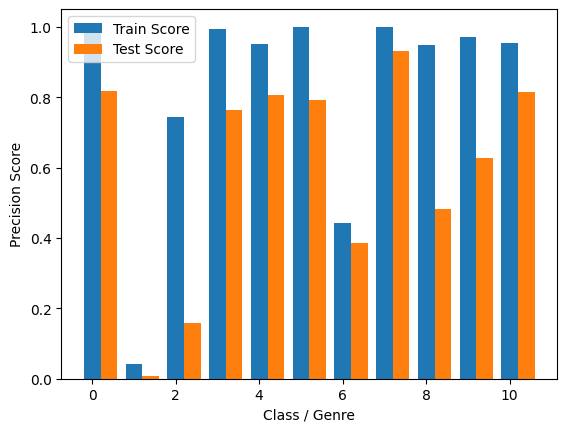

Train Avg Precision : 0.8224
Test  Avg Precision : 0.5981


(array([1.        , 0.04081633, 0.74285714, 0.99456522, 0.95061728,
        1.        , 0.44339623, 1.        , 0.94928685, 0.9701897 ,
        0.95415695]),
 array([0.816     , 0.00727273, 0.15748031, 0.7625    , 0.80519481,
        0.79310345, 0.38416988, 0.93043478, 0.48247978, 0.62574257,
        0.81515152]))

In [92]:
get_Score(model, X_train.iloc[indices], X_test, y_train.iloc[indices], y_test)

In [29]:
import pandas as pd
df_check = pd.read_csv('Dataset 6 - Music Dataset/music.csv')

In [37]:
df_check.query('Class == 2 and Popularity > 50')

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
69,Keb' Mo',The Medicine Man [Feat. Old Crow Medicine Show],54.0,0.801,0.637,NaN,-6.406,1,0.0565,0.16900,0.000037,0.0925,0.769,77.012,218360.0,4,2
372,Freddie King,Going Down,59.0,0.565,0.526,NaN,-11.352,1,0.0365,0.03390,0.000119,0.1100,0.637,167.936,204333.0,4,2
1141,Brittany Howard,Stay High,54.0,0.598,0.853,9.0,-5.373,1,0.0545,0.13200,0.002970,0.1320,0.312,121.988,191396.0,1,2
1263,Josh Teskey,Push The Blues Away,51.0,0.538,0.381,2.0,-8.119,1,0.0349,0.79700,0.000004,0.1150,0.193,86.023,209619.0,4,2
1400,Elmore James,The Sky Is Crying,53.0,0.294,0.611,2.0,-6.268,1,0.0348,0.02260,0.435000,0.1140,0.567,178.191,166400.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,ZZ Top,Tush - 2006 Remaster,66.0,0.580,0.885,NaN,-5.154,0,0.0715,0.10000,0.001570,0.1460,0.788,145.405,137933.0,4,2
17524,The Devil Makes Three,Champagne And Reefer,56.0,0.735,0.836,2.0,-7.467,1,0.0451,0.35300,0.014300,0.3420,0.781,121.251,174248.0,4,2
17803,Thelonious Monk,"Straight, No Chaser",53.0,0.465,0.350,3.0,-12.977,1,0.0403,0.41000,0.279000,0.1350,0.620,93.336,688133.0,4,2
17856,The Black Keys,Poor Boy a Long Way From Home,66.0,0.404,0.924,11.0,-5.387,0,0.0701,0.00123,0.748000,0.4420,0.417,93.418,248511.0,4,2
